### Init

In [2]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
from PIL import Image
from ipywidgets import interact, FloatSlider, IntSlider, fixed, Output, widgets, interactive
from ultralytics import YOLOWorld
from skimage.morphology import skeletonize


from utils import display_images
from ui.image_viewer import view_image


(876, 1122, 3)

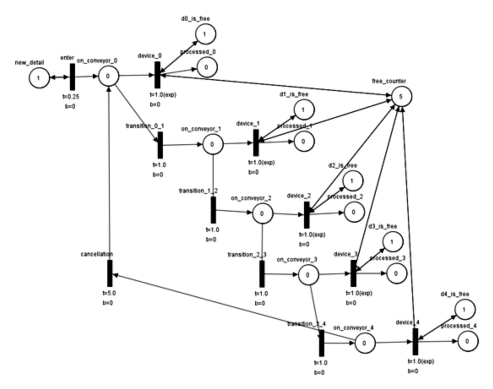

In [82]:
model_dir = '../models' 
os.makedirs(model_dir, exist_ok=True)

img_path = '../data/else/sunset-lake-landscape-illustration-free-vector.jpg'
img_path = '../data/else/arrows.png'
img_path = '../data/else/dogs.jpeg'
img_path = '../data/else/overlapped.png'
img_path = '../data/else/padded_image.png'

img_path = '../data/local/simple_petri_1.jpg'
img_path = '../data/local/complex_petri_1.jpg'
img_path = '../data/local/complex_petri_2_temp.png'
img_path = '../data/local/mid_petri_1.png'

img_path = '../data/morphed/mid_petri_1_1.5_contrast.png'

# img_path = '../data/internet/hand_drawn_petri.jpg'

img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_inverted = cv2.bitwise_not(img_gray)

plt.imshow(img_gray, cmap='gray')
plt.axis('off') 

img.shape

### Color distribution(histogram)

Number of unique pixel values: 256
Unique pixel values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 2

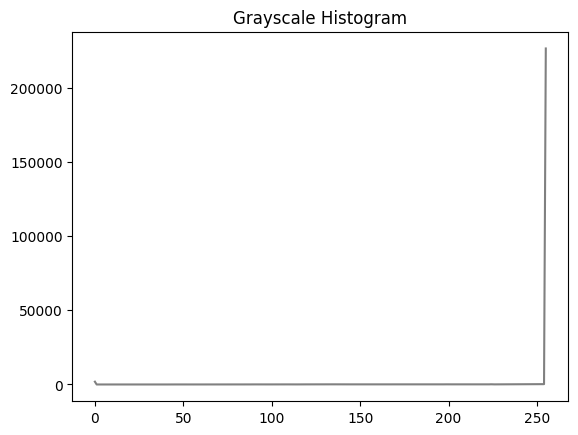

In [4]:
gray_hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.plot(gray_hist, color='gray')
plt.title('Grayscale Histogram')

unique_values = np.unique(img_gray)
print(f"Number of unique pixel values: {len(unique_values)}")
print(f"Unique pixel values: {unique_values}")

### Testing different thresholding techniques

In [ ]:
_, thresh_basic = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

_, thresh_otsu = cv2.threshold(img_gray, 0, 255,  cv2.THRESH_OTSU) #cv2.THRESH_BINARY_INV +

thresh_adaptive_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 5, 2)
thresh_adaptive_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

view_image(thresh_otsu, 'Otsu Thresholding')
view_image(thresh_adaptive_mean, 'Adaptive Mean Thresholding')


### Experimenting with matplotlib and opencv imshow

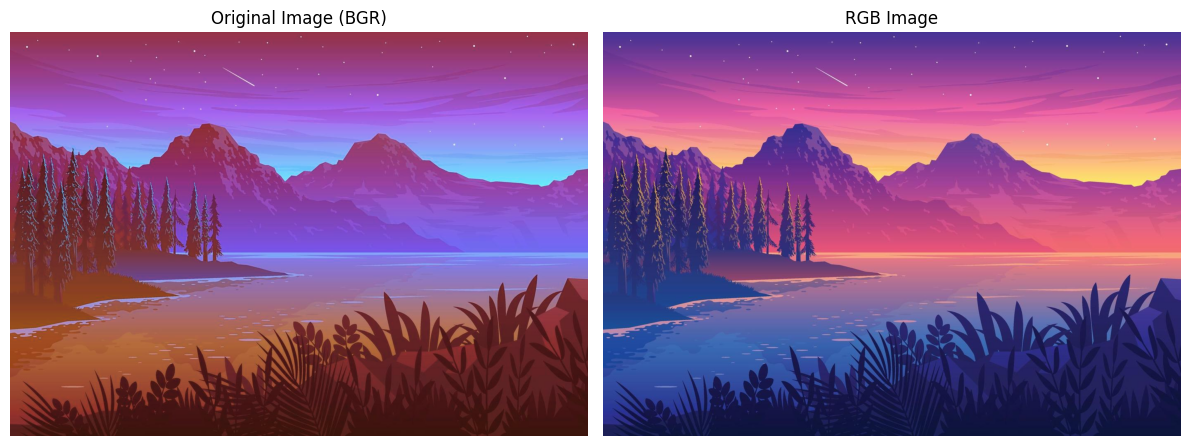

In [ ]:
img = cv2.imread('../../assets/else/sunset-lake-landscape-illustration-free-vector.jpg')
img_converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img)  # Convert BGR to RGB for correct display
plt.title('Original Image (BGR)')
plt.axis('off')

# Display converted RGB image
plt.subplot(1, 2, 2)
plt.imshow(img_converted)  # img_gray is already in RGB format
plt.title('RGB Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Display images using OpenCV instead of matplotlib

# Create named windows
cv2.namedWindow('Original Image (BGR)', cv2.WINDOW_NORMAL)
cv2.namedWindow('RGB Image', cv2.WINDOW_NORMAL)

# Resize windows (optional)
cv2.resizeWindow('Original Image (BGR)', 800, 600)
cv2.resizeWindow('RGB Image', 800, 600)

# Display the images
cv2.imshow('Original Image (BGR)', img)
cv2.imshow('RGB Image', img_converted)

# Wait for a key press (0 means wait indefinitely)
print("Press any key to close the windows")
cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()

Press any key to close the windows


### Skeletonizing 

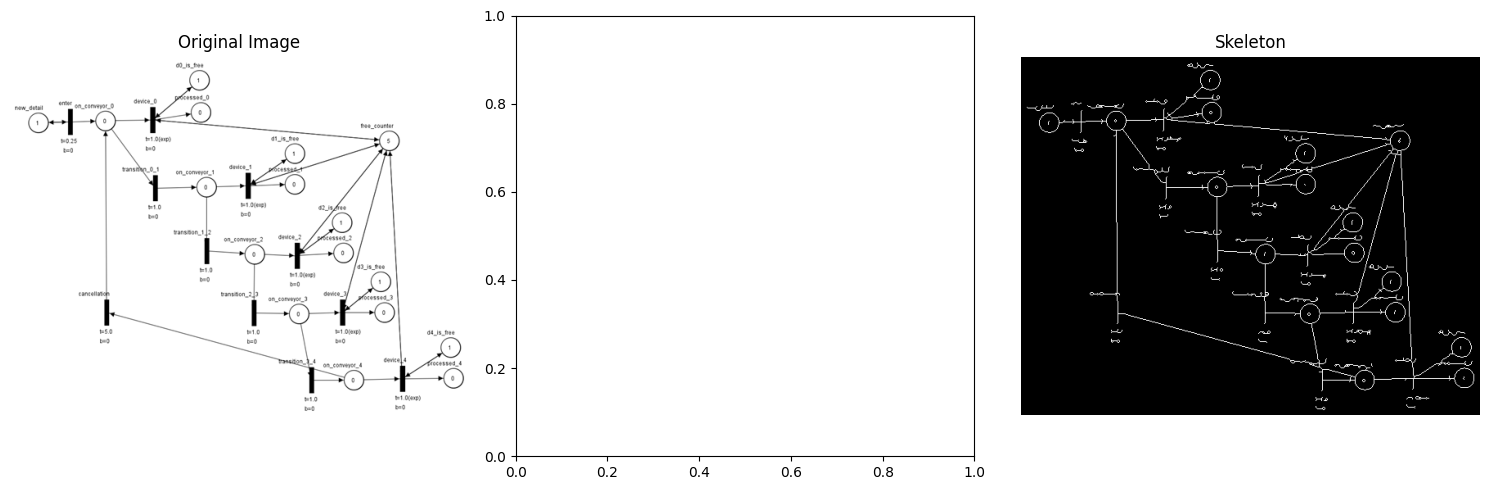

True

In [ ]:
from skimage.morphology import skeletonize
import numpy as np

import matplotlib.pyplot as plt

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary (black and white)
# _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Normalize to have 0s and 1s for skeletonize
# binary_norm = binary / 255
################################

# Invert the grayscale image (optional, depending on the input image)
gray = cv2.bitwise_not(gray)
binary_norm = gray / 255

################################

# Apply skeletonization
skeleton = skeletonize(binary_norm)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# axes[1].imshow(binary, cmap='gray')
# axes[1].set_title('Binary Image')
# axes[1].axis('off')

axes[2].imshow(skeleton, cmap='gray')
axes[2].set_title('Skeleton')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Save the skeletonized image
skeleton_image_path = '../data/morphed/mid_petri_1_skeleton.png'
cv2.imwrite(skeleton_image_path, (skeleton * 255).astype(np.uint8))

(np.float64(-0.5), np.float64(299.5), np.float64(163.5), np.float64(-0.5))

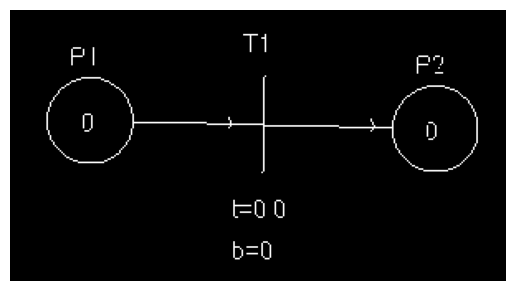

In [12]:
plt.imshow(skeleton, cmap='gray')
plt.axis('off')

### YOLO

In [76]:
# # Print available classes in your model
print("Available classes in the model:", model.names)

# # Try with a lower confidence threshold
# results = model(image_path, conf=0.25)  # Lower the confidence threshold

Available classes in the model: {0: 'circle'}


In [75]:
# Initialize the model with custom path
# model_path = os.path.join(model_dir, "yolov8s-world.pt")
model_path = os.path.join(model_dir, "yolov8x-world.pt")

# Initialize a YOLO-World model
model = YOLOWorld(model_path)

# Define custom classes
model.set_classes(["circle"])
model.to('cpu')  # Move model to CPU

# Execute prediction on an image
results = model.predict(img_path, conf = 0.01, device='cpu')

# Display the results
results[0].show()


image 1/1 c:\Users\samoed\Documents\GitHub\diploma_bachelor\src\..\data\internet\hand_drawn_petri.jpg: 384x640 (no detections), 601.0ms
Speed: 3.9ms preprocess, 601.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


### Arrows 

In [ ]:
def preprocess(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 1)
    img_canny = cv2.Canny(img_blur, 50, 50)
    kernel = np.ones((3, 3))
    img_dilate = cv2.dilate(img_canny, kernel, iterations=2)
    img_erode = cv2.erode(img_dilate, kernel, iterations=1)
    return img_erode

def find_tip(points, convex_hull):
    length = len(points)
    indices = np.setdiff1d(range(length), convex_hull)

    for i in range(2):
        j = indices[i] + 2
        if j > length - 1:
            j = length - j
        if np.all(points[j] == points[indices[i - 1] - 2]):
            return tuple(points[j])



preprocessed_img = preprocess(img)

contours_list, hierarchy = cv2.findContours(preprocessed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours_list:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.025 * peri, True)
    hull = cv2.convexHull(approx, returnPoints=False)
    sides = len(hull)

    if 6 > sides > 3 and sides + 2 == len(approx):
        arrow_tip = find_tip(approx[:,0,:], hull.squeeze())
        if arrow_tip:
            cv2.drawContours(img, [cnt], -1, (0, 255, 0), 3)
            cv2.circle(img, arrow_tip, 3, (0, 0, 255), cv2.FILLED)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Else

In [ ]:
def apply_gaussian_blur(kernel_size=5, sigma_x=0):
    clear_output(wait=True)
    
    kernel_size = max(1, kernel_size if kernel_size % 2 == 1 else kernel_size + 1)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    blurred = cv2.GaussianBlur(img_rgb, (kernel_size, kernel_size), sigma_x)
    
    view_image(blurred)
    

# Create interactive widget
interact(
    apply_gaussian_blur,
    kernel_size=IntSlider(min=1, max=25, step=2, value=5, description='Kernel Size'),
    sigma_x=FloatSlider(min=0, max=10, step=0.1, value=0, description='Sigma')
)

interactive(children=(IntSlider(value=5, description='Kernel Size', max=25, min=1, step=2), FloatSlider(value=…

<function __main__.apply_gaussian_blur(kernel_size=5, sigma_x=0)>

### Worksflow 1

Morphology-based Segmentation

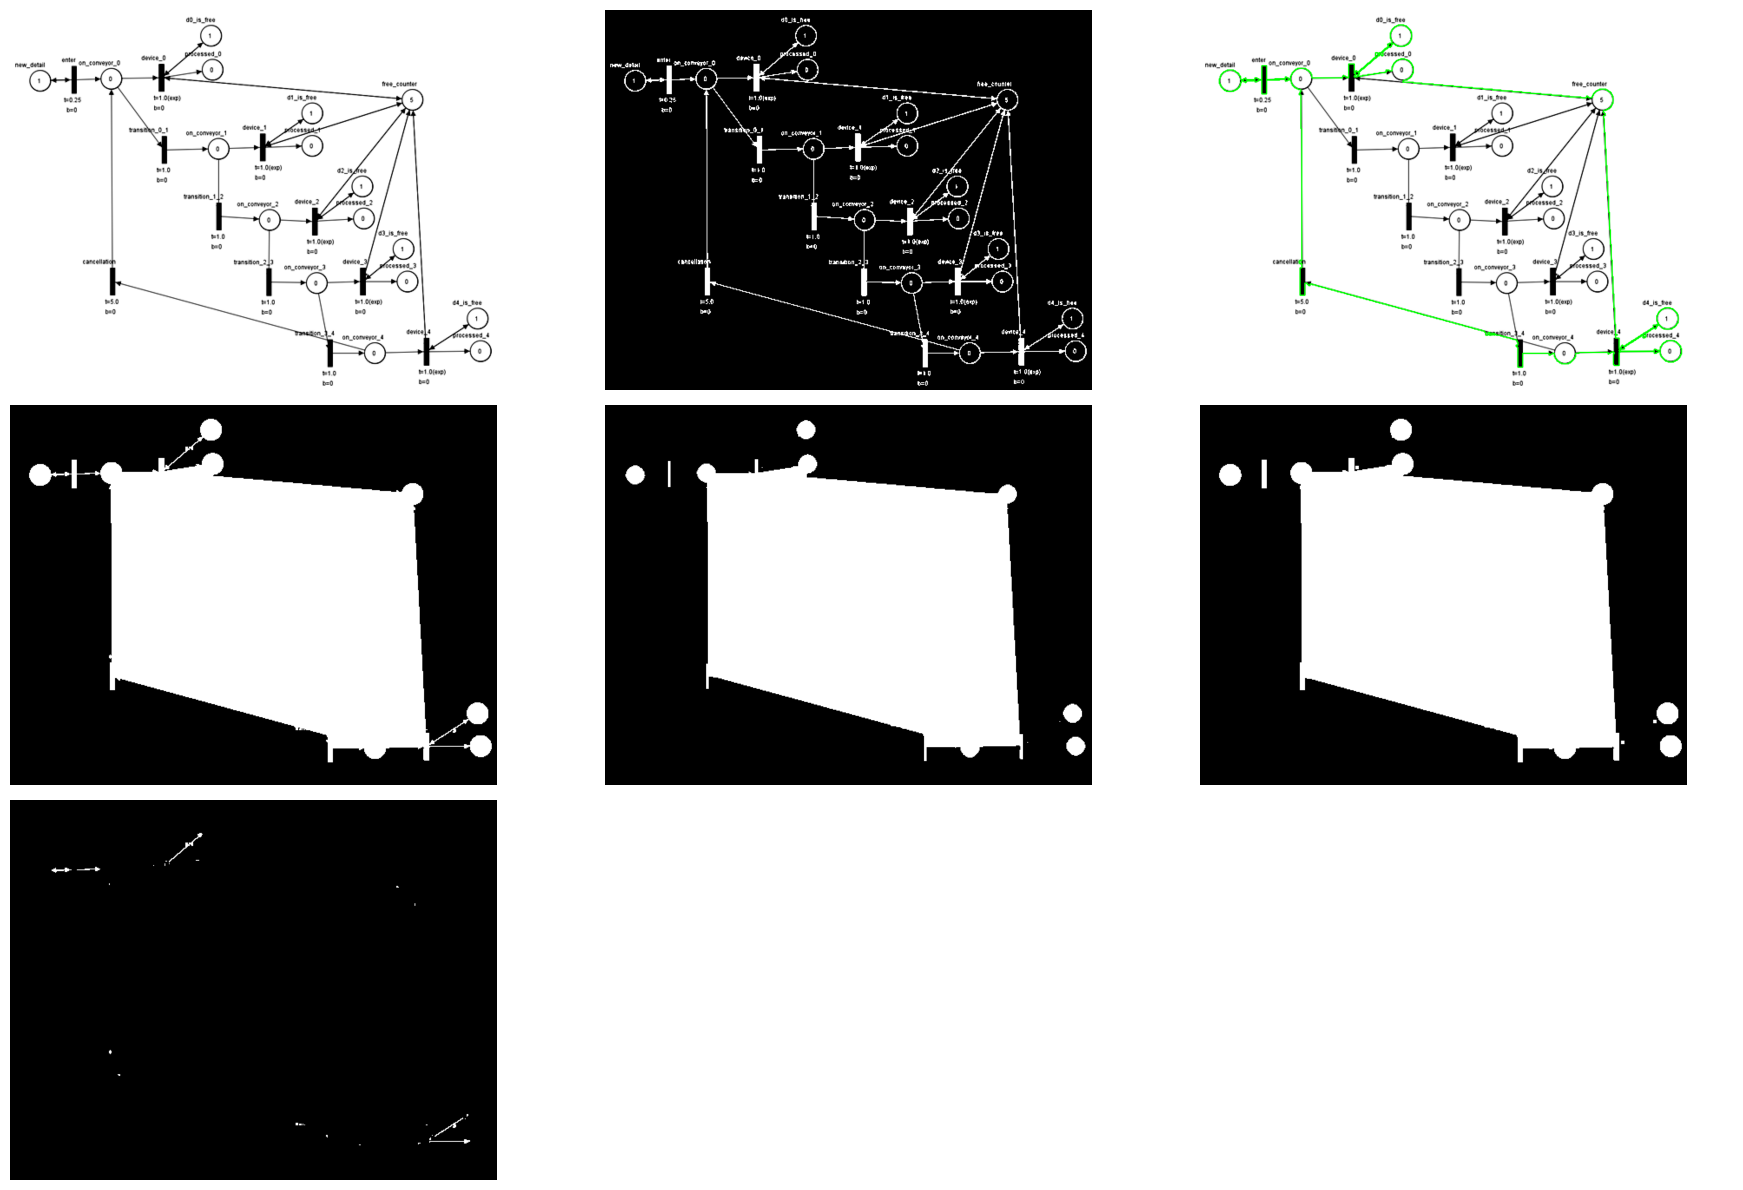

interactive(children=(IntSlider(value=3, description='Kernel Size', max=15, min=1), IntSlider(value=1, descrip…

<function __main__.apply_erosion(img, kernel_size=3, iterations=1)>

In [ ]:
### ATTEMPT 1

_, thresh_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU

contours_list, hierarchy = cv2.findContours(thresh_otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# largest_contour = max(contours_list, key=cv2.contourArea)

# # 6. Create mask from the largest contour
# graph_mask = np.zeros_like(img_gray)
# cv2.drawContours(graph_mask, [largest_contour], 0, 255, -1)

kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(img_gray, kernel, iterations=3)

# 8. Dilate to restore node size
nodes_mask = cv2.dilate(eroded, kernel, iterations=3)

# 9. Create edges mask by subtracting nodes from original binary
edges_mask = cv2.subtract(graph_mask, nodes_mask)

display_images(
    [img_gray, thresh_otsu, 
     cv2.drawContours(img.copy(), [largest_contour], 0, (0, 255, 0), 2),
     graph_mask, eroded, nodes_mask, edges_mask],
    rows=3,
    figsize=(18, 12)  # Increased figure size
)

def apply_erosion(img, kernel_size=3, iterations=1):
    clear_output(wait=True)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded = cv2.erode(img, kernel, iterations=iterations)
    view_image(eroded)

# Create interactive widget
interact(
    apply_erosion,
    img=fixed(thresh_otsu),
    kernel_size=IntSlider(min=1, max=15, step=1, value=3, description='Kernel Size'),
    iterations=IntSlider(min=1, max=10, step=1, value=1, description='Iterations')
)

### Contours

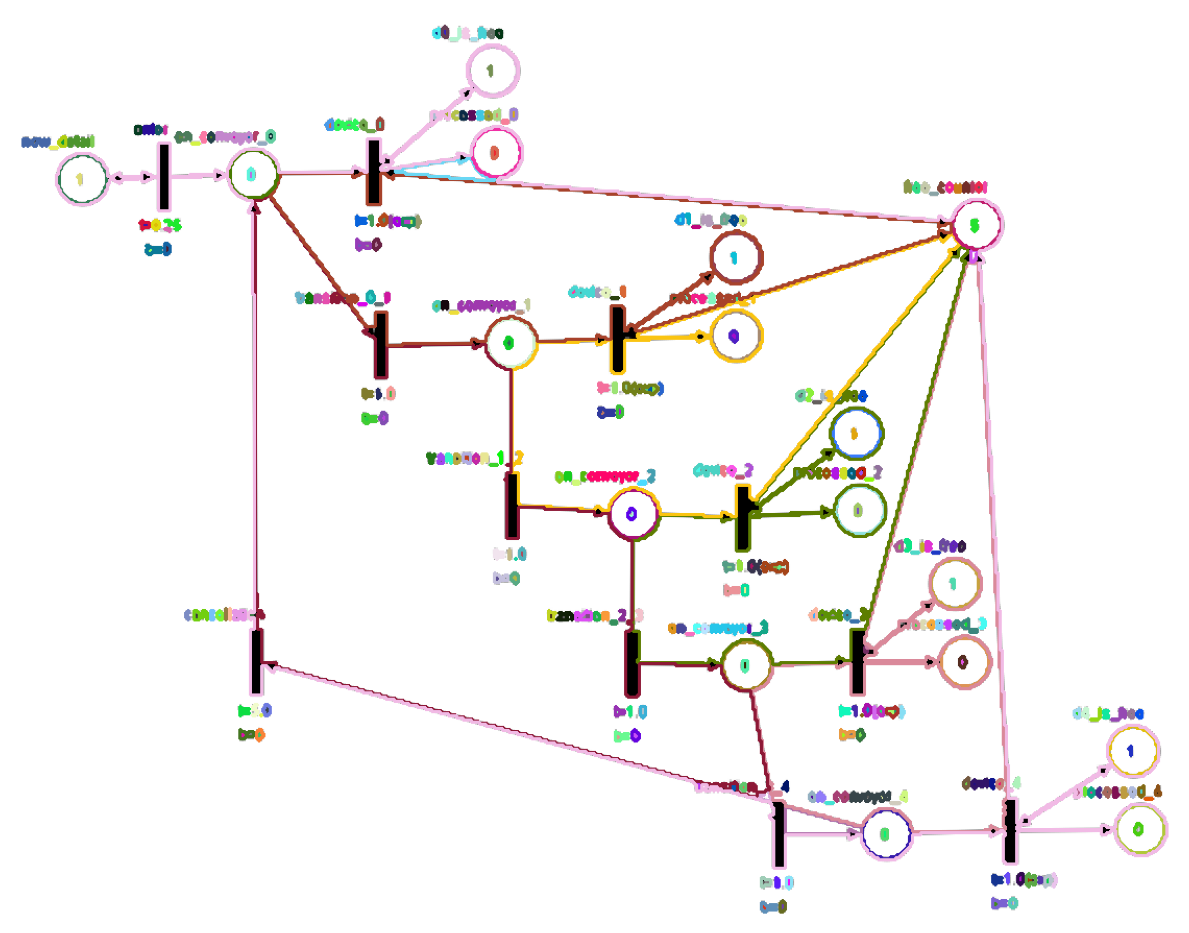

Found 430 contours


In [92]:
img_contour = img.copy()
for i, contour in enumerate(contours_list):
    color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
    cv2.drawContours(img_contour, [contour], -1, color, 2)

# Convert to RGB for matplotlib display
result_rgb = cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB)


display_images([result_rgb], rows=1, figsize=(12, 10))
print(f"Found {len(contours_list)} contours")


In [63]:
def is_circle_enclosing(contour, threshold):
    (x, y), radius = cv2.minEnclosingCircle(contour)
    enclosing_area = np.pi * (radius ** 2)
    contour_area = cv2.contourArea(contour)
    
    return contour_area / enclosing_area > threshold 

def is_circle_circularity(contour, threshold): #TODO: add threshold
        # Calculate contour area and perimeter
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    
    # Calculate circularity - a perfect circle has circularity = 1
    # Formula: 4π × Area/Perimeter²
    if perimeter == 0:
        return False
    circularity = 4 * np.pi * area / (perimeter * perimeter)
    
    # Consider additional criteria for better circle detection
    # Get bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h if h > 0 else 0
    
    # Filter based on circularity and other optional criteria
    return circularity > 0.8 and 0.8 < aspect_ratio < 1.2 and area > 50

def is_circle_hough(contour, threshold):
    x, y, w, h = cv2.boundingRect(contour)

    # Create a blank image slightly larger than the contour
    padding = 10
    mask = np.zeros((h + 2*padding, w + 2*padding), dtype=np.uint8)

    # Shift the contour to fit in the blank image
    shifted_contour = contour.copy()
    shifted_contour[:, :, 0] = contour[:, :, 0] - x + padding
    shifted_contour[:, :, 1] = contour[:, :, 1] - y + padding

    # Draw just the contour on the blank image
    cv2.drawContours(mask, [shifted_contour], -1, 255, 1)

    # Ensure input is grayscale (HoughCircles requires single-channel)    
    if len(mask.shape) > 2:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    
    # Detect circles
    circles = cv2.HoughCircles(
        mask, 
        cv2.HOUGH_GRADIENT, 
        dp=1, 
        minDist=20, 
        param1=5, 
        param2=25, 
        minRadius=5, 
        maxRadius=95
    )

    return circles is not None
    
    

In [93]:
kernel = np.ones((3, 3), np.uint8)
otsu_dilated = cv2.dilate(thresh_otsu, kernel, iterations=1) ## TODO: Heuristic

contours_from_dilated, hierarchy = cv2.findContours(otsu_dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw on
img_circles = img.copy()
circular_contours = dict()
# Filter for circular contours
for i, contour in enumerate(contours_from_dilated):
    if is_circle_enclosing(contour, 0.7):
        circular_contours[i] = contour
        # Generate a random color for each contour
        color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
        cv2.drawContours(img_circles, [contour], -1, color, 2)
        
result_rgb = cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB)



print(f"Found {len(circular_contours)} circular contours out of {len(contours_from_dilated)} total contours")
print(f"Circular contours indices: {list(circular_contours.keys())}")

for idx, contour in list(circular_contours.items())[:5]:  
    x, y, w, h = cv2.boundingRect(contour)
    area = cv2.contourArea(contour)
    print(f"Contour {idx}: position=({x},{y}), size={w}x{h}, area={area}")

# view_image(otsu_dilated, 'Dilated Otsu Thresholding')
# view_image(result_rgb, 'Filtered Circular Contours')

Found 31 circular contours out of 125 total contours
Circular contours indices: [8, 12, 14, 20, 33, 34, 36, 39, 45, 53, 56, 57, 58, 59, 63, 75, 76, 77, 79, 81, 91, 99, 101, 105, 108, 109, 111, 113, 115, 120, 122]
Contour 8: position=(1080,784), size=4x4, area=7.0
Contour 12: position=(818,768), size=46x46, area=1482.0
Contour 14: position=(1062,764), size=44x44, area=1471.5
Contour 20: position=(1054,688), size=46x46, area=1473.5
Contour 33: position=(684,608), size=46x44, area=1472.5


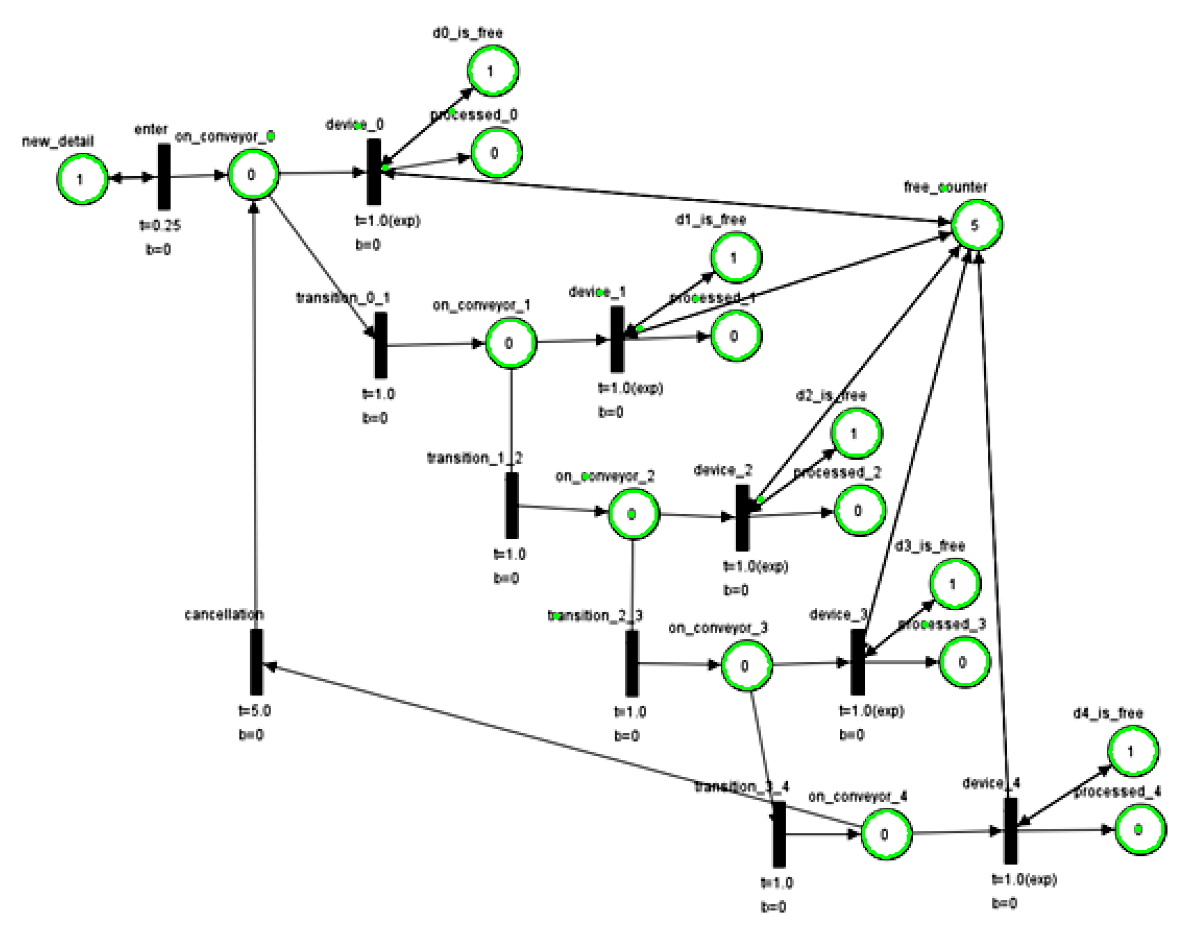

In [94]:
# Create a copy of the original image to draw on
img_contour = img.copy()

for key in circular_contours.keys():
    # Generate a random color for each contour
    # color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
    # cv2.drawContours(img_contour, [circular_contours[key]], -1, color, 2)
    cv2.drawContours(img_contour, [circular_contours[key]], -1, (0, 255, 0), 2)

result_rgb = cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB)

display_images([result_rgb], rows=1, figsize=(12, 10))

In [ ]:
circular_contours

Number of circular contours: 29
Min area: 5.50, Max area: 6481.50


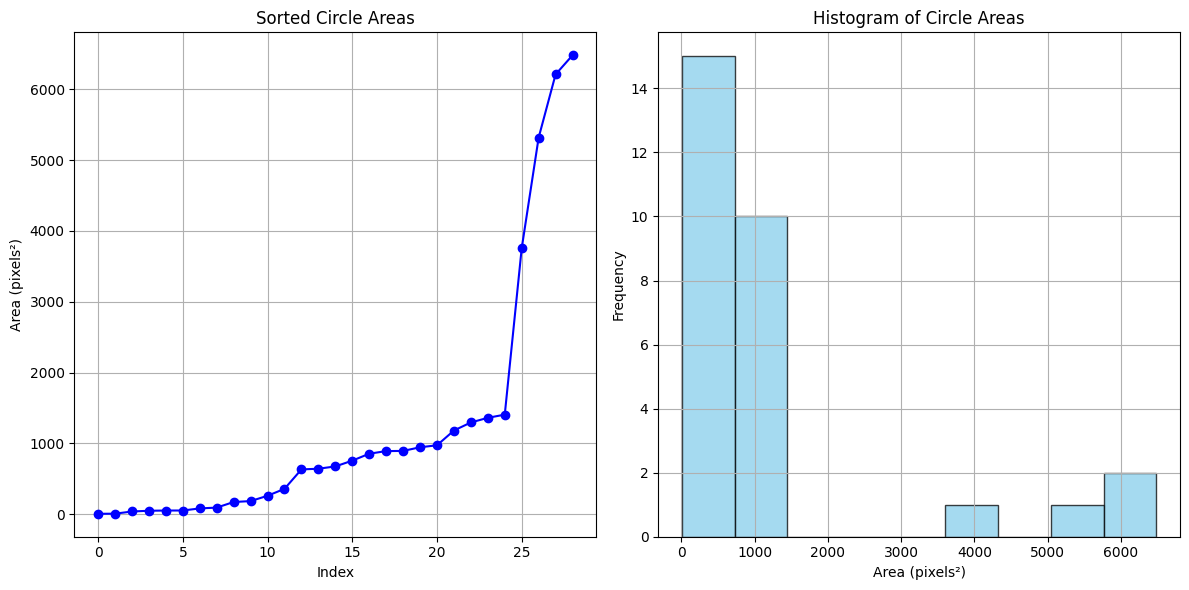


Potential natural groupings at indices:
Gap between areas 1406.00 and 3755.50
Gap between areas 3755.50 and 5318.00
Gap between areas 5318.00 and 6211.00
Cluster 1: 25 elements, range: 5.50 - 1406.00
Cluster 2: 1 elements, range: 3755.50 - 3755.50
Cluster 3: 1 elements, range: 5318.00 - 5318.00
Cluster 4: 2 elements, range: 6211.00 - 6481.50


In [74]:
circle_areas = []

# 1. Calculate the area for each contour
for idx, contour in list(circular_contours.items()):
    if len(contour) >= 3:
        
        # Use absolute area in case contour orientation affects sign
        area = abs(cv2.contourArea(contour))
        # Use a small epsilon for floating point comparison
        if area > 1e-6:
            circle_areas.append(area)


# Sort the areas
sorted_areas = sorted(circle_areas)
print(f"Number of circular contours: {len(sorted_areas)}")
print(f"Min area: {min(sorted_areas):.2f}, Max area: {max(sorted_areas):.2f}")

# Plot sorted areas to see step changes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(sorted_areas)), sorted_areas, 'bo-')
plt.title('Sorted Circle Areas')
plt.xlabel('Index')
plt.ylabel('Area (pixels²)')
plt.grid(True)

# Create histogram to identify groupings
plt.subplot(1, 2, 2)
# Use Freedman-Diaconis rule for optimal bin width
q75, q25 = np.percentile(sorted_areas, [75, 25])
bin_width = 2 * (q75 - q25) * len(sorted_areas)**(-1/3)
bins = int((max(sorted_areas) - min(sorted_areas)) / bin_width) if bin_width > 0 else 20
bins = min(50, bins)  # Cap at 50 bins for visibility

n, bins, patches = plt.hist(sorted_areas, bins=bins, alpha=0.75, color='skyblue', edgecolor='black')
plt.title('Histogram of Circle Areas')
plt.xlabel('Area (pixels²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Look for natural gaps/clusters using simple analysis
from scipy import stats

# Calculate differences between adjacent sorted areas to find jumps
area_differences = [sorted_areas[i+1] - sorted_areas[i] for i in range(len(sorted_areas)-1)]
significant_gaps = [i for i, diff in enumerate(area_differences) if diff > np.mean(area_differences) + np.std(area_differences)]

if significant_gaps:
    print("\nPotential natural groupings at indices:")
    for gap_idx in significant_gaps:
        print(f"Gap between areas {sorted_areas[gap_idx]:.2f} and {sorted_areas[gap_idx+1]:.2f}")
    
    # Suggest potential clusters based on gaps
    clusters = []
    start_idx = 0
    for gap_idx in significant_gaps:
        clusters.append(sorted_areas[start_idx:gap_idx+1])
        start_idx = gap_idx+1
    clusters.append(sorted_areas[start_idx:])
    
    for i, cluster in enumerate(clusters):
        if len(cluster) > 0:
            print(f"Cluster {i+1}: {len(cluster)} elements, range: {min(cluster):.2f} - {max(cluster):.2f}")
else:
    print("No significant natural gaps found in the data.")

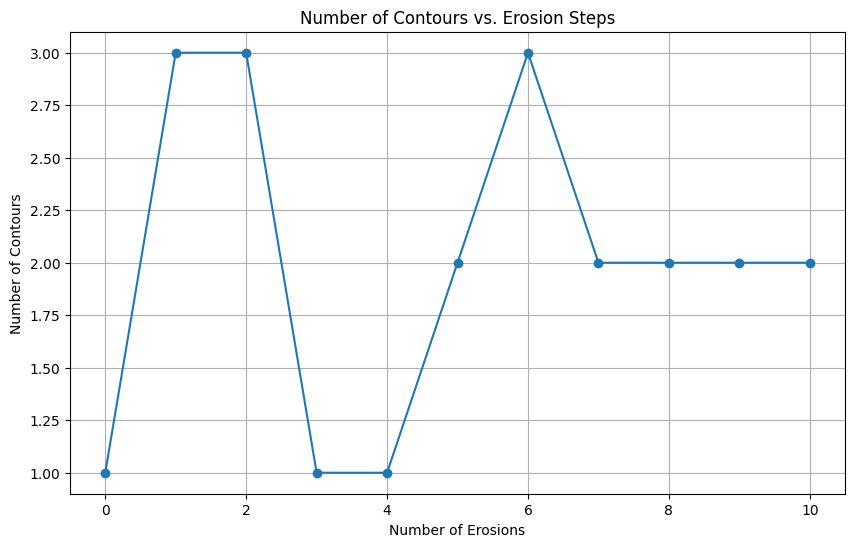

In [68]:
# 7. Determine optimal number of erosions using contour stabilization heuristic
kernel = np.ones((3, 3), np.uint8)
current_mask = graph_mask.copy()
contour_counts = []
num_erosions = 0
stabilization_steps = 3  # Number of consecutive stable steps to stop
stable_count = 0
previous_count = None

while True:
    # Find contours in the current mask
    contours_list, _ = cv2.findContours(current_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    current_count = len(contours_list)
    contour_counts.append(current_count)
    
    # Check if the count has stabilized
    if previous_count is not None:
        if current_count == previous_count:
            stable_count += 1
        else:
            stable_count = 0
    
    previous_count = current_count
    
    # Stop if stabilized for required steps or if max steps reached (prevent infinite loop)
    if stable_count >= stabilization_steps:
        break
    
    # Apply erosion
    current_mask = cv2.erode(current_mask, kernel, iterations=1)
    num_erosions += 1

# The eroded mask after optimal erosions
eroded = current_mask

# 8. Dilate to restore node size (using the same number of iterations)
nodes_mask = cv2.dilate(eroded, kernel, iterations=num_erosions)

# 9. Create edges mask by subtracting nodes from original binary
edges_mask = cv2.subtract(graph_mask, nodes_mask)

plt.figure(figsize=(10, 6))
plt.plot(range(len(contour_counts)), contour_counts, marker='o', linestyle='-')
plt.xlabel('Number of Erosions')
plt.ylabel('Number of Contours')
plt.title('Number of Contours vs. Erosion Steps')
plt.grid(True)
plt.show()

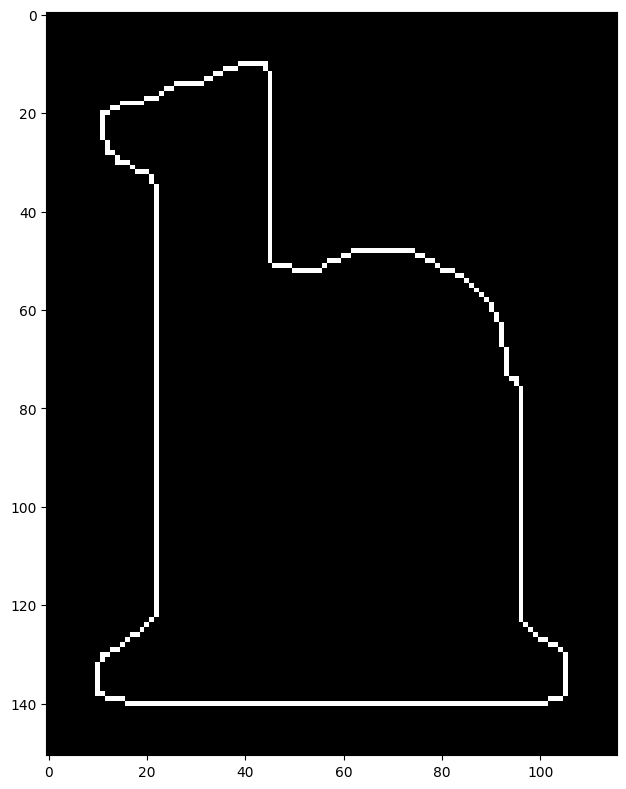

Contour properties:
Position: (2309, 1774)
Dimensions: 96x131
Area: 7772.50 pixels²
Perimeter: 445.44 pixels
Circularity: 0.4923 (1.0 = perfect circle)


In [ ]:
def display_isolated_contour(contour):
    
    # Get bounding rectangle to determine size
    x, y, w, h = cv2.boundingRect(contour)
    
    # Create a blank image slightly larger than the contour
    padding = 10
    mask = np.zeros((h + 2*padding, w + 2*padding), dtype=np.uint8)
    
    # Shift the contour to fit in the blank image
    shifted_contour = contour.copy()
    shifted_contour[:, :, 0] = contour[:, :, 0] - x + padding
    shifted_contour[:, :, 1] = contour[:, :, 1] - y + padding
    
    # Draw just the contour on the blank image
    cv2.drawContours(mask, [shifted_contour], -1, 255, 1)
    
    # Display the isolated contour
    plt.figure(figsize=(8, 8))
    plt.imshow(mask, cmap='gray')
    plt.axis('on')
    plt.tight_layout()
    plt.show()
    
    # Print some information about the contour
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0
    
    print(f"Contour properties:")
    print(f"Position: ({x}, {y})")
    print(f"Dimensions: {w}x{h}")
    print(f"Area: {area:.2f} pixels²")
    print(f"Perimeter: {perimeter:.2f} pixels")
    print(f"Circularity: {circularity:.4f} (1.0 = perfect circle)")
    return mask

# Use the function to display the 5th circular contour
mask = display_isolated_contour(contours_list[5])

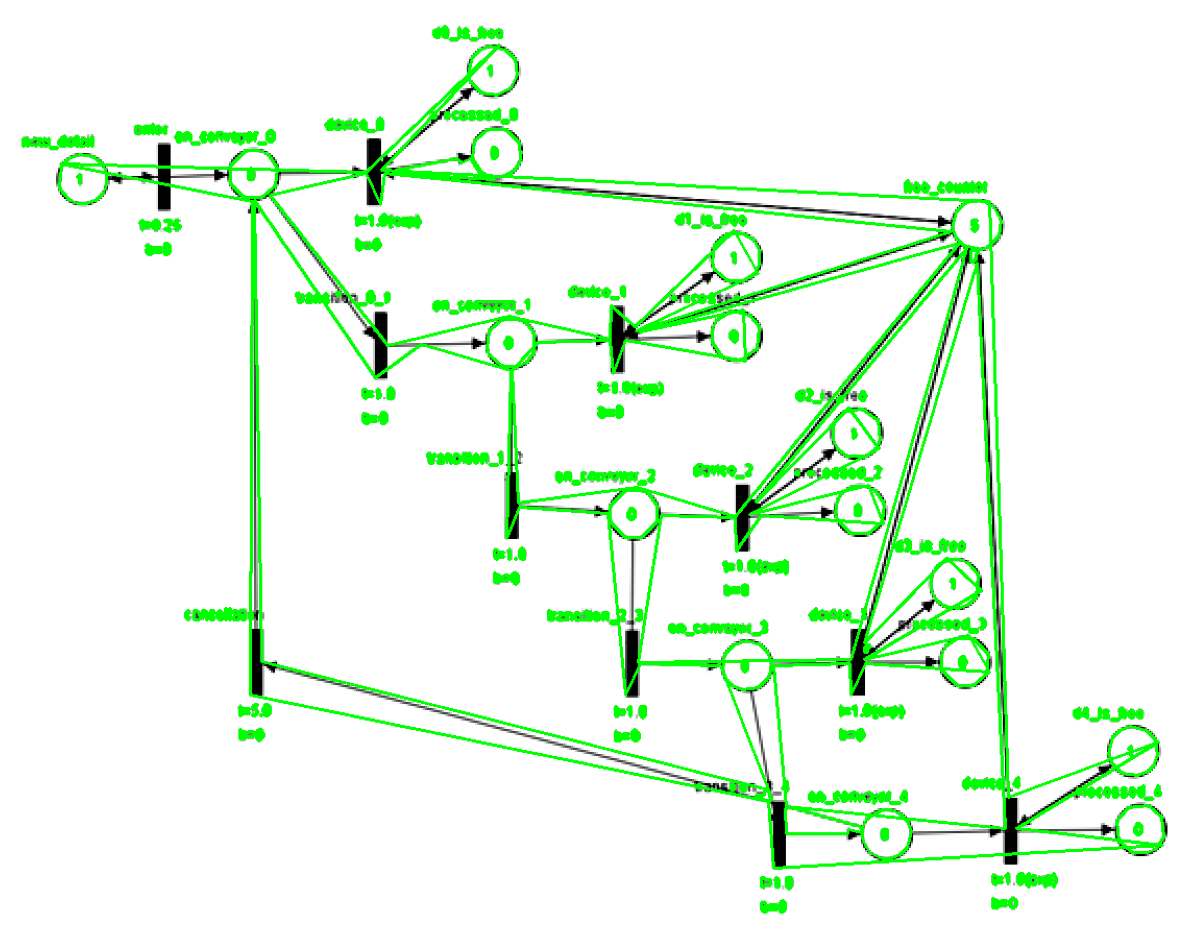

In [97]:
# run cvApproxPoly on contours
def approx_poly(contour, epsilon=0.01):

    # Calculate the perimeter of the contour
    peri = cv2.arcLength(contour, True)
    
    # Approximate the contour
    approx = cv2.approxPolyDP(contour, epsilon * peri, True)
    
    return approx

# Create a copy of the original image to draw on
img_approx = img.copy()
for i, contour in enumerate(contours_list):
    approx = approx_poly(contour, epsilon=0.01)
    cv2.drawContours(img_approx, [approx], -1, (0, 255, 0), 2)

result_rgb = cv2.cvtColor(img_approx, cv2.COLOR_BGR2RGB)
display_images([result_rgb], rows=1, figsize=(12, 10))

### Hough transform
It looks like we would have to remove all the text 

In [7]:
def find_circles(image, min_radius=5, max_radius=20, param1=50, param2=30):
    # Ensure input is grayscale (HoughCircles requires single-channel)
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect circles
    circles = cv2.HoughCircles(
        image, 
        cv2.HOUGH_GRADIENT, 
        dp=1, 
        minDist=20, 
        param1=param1, 
        param2=param2, 
        minRadius=min_radius, 
        maxRadius=max_radius
    )

    if circles is not None:
        # Convert coordinates and radius to integers
        circles = np.uint16(np.around(circles))
        
        # Create a color version of the image for drawing
        if len(image.shape) == 2:
            result_hough = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        else:
            result_hough = image.copy()
        
        # Draw detected circles
        for i in circles[0, :]:
            # Draw outer circle (green)
            cv2.circle(result_hough, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw center (red)
            cv2.circle(result_hough, (i[0], i[1]), 2, (0, 0, 255), 3)
        
        # Convert BGR to RGB for matplotlib
        result_hough_rgb = cv2.cvtColor(result_hough, cv2.COLOR_BGR2RGB)
        
        # Display results
        plt.figure(figsize=(12, 10))
        plt.imshow(result_hough_rgb)
        plt.title(f'Circles Detected (Hough Transform) - {len(circles[0])} found')
        plt.axis('off')
        plt.show()
    else:
        print("No circles detected!")

interact(
    find_circles,
    image=fixed(mask),
    min_radius=IntSlider(min=0, max=100, step=1, value=5, description='Min Radius'),
    max_radius=IntSlider(min=0, max=100, step=1, value=95, description='Max Radius'),
    param1=IntSlider(min=0, max=200, step=1, value=2, description='Param 1'),
    param2=IntSlider(min=0, max=200, step=1, value=25, description='Param 2')
)

interactive(children=(IntSlider(value=5, description='Min Radius'), IntSlider(value=95, description='Max Radiu…

<function __main__.find_circles(image, min_radius=5, max_radius=20, param1=50, param2=30)>

In [ ]:
def apply_hough_lines(image, rho=1, theta=np.pi/180, threshold=100, 
                     min_line_length=100, max_line_gap=10, display=True):


    gray = img_gray.copy()


    
    # Apply edge detection
    # edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Apply Hough Lines Transform
    lines = cv2.HoughLinesP(gray, rho, theta, threshold, 
                          minLineLength=min_line_length,
                          maxLineGap=max_line_gap)
    
    # Create a copy of the original image for visualization
    result_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR) if len(image.shape) == 2 else image.copy()
    
    # Draw lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    if display:
        result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
        plt.imshow(result_rgb)
    
    return lines, result_image

def interactive_hough_lines():
    def update(rho=1, theta_div=180, threshold=100, min_line_length=100, max_line_gap=10):
        clear_output(wait=True)
        theta = np.pi / theta_div
        lines, result = apply_hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap)
        if lines is not None:
            print(f"Detected {len(lines)} lines")
        else:
            print("No lines detected")
    
    interact(
        update,
        rho=FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Rho:'),
        theta_div=IntSlider(min=60, max=360, step=30, value=180, description='Theta Divisor:'),
        threshold=IntSlider(min=10, max=300, step=10, value=100, description='Threshold:'),
        min_line_length=IntSlider(min=10, max=300, step=10, value=100, description='Min Line Length:'),
        max_line_gap=IntSlider(min=1, max=50, step=1, value=10, description='Max Line Gap:')
    )

# Call the interactive function
interactive_hough_lines()

interactive(children=(FloatSlider(value=1.0, description='Rho:', max=10.0, min=0.1), IntSlider(value=180, desc…

In [106]:
# Perform skeletonization
skeleton = skeletonize(thresh_otsu )

Image.fromarray((skeleton * 255).astype(np.uint8)).show()



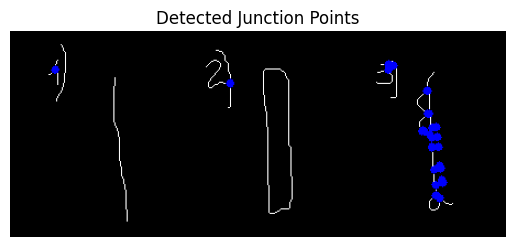

In [111]:
img = cv2.imread("../data/else/transitions.jpg", cv2.IMREAD_GRAYSCALE)
# img = img_gray.copy()

# Step 2: Binarize
_, binary = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY_INV)

# Step 3: Skeletonize
skeleton = skeletonize(binary).astype(np.uint8)

# Step 4: Create a kernel to count neighbors
kernel = np.array([[1,1,1],
                   [1,10,1],
                   [1,1,1]])

# Step 5: Convolve to get neighbor counts
neighbor_count = cv2.filter2D(skeleton, -1, kernel)

# Step 6: Find junctions (value > 12 means 3+ neighbors, since center is 10)
junctions = np.where((neighbor_count > 12) & (skeleton == 1))

# Visualize
output = np.stack([skeleton*255]*3, axis=2)  # RGB image
for y, x in zip(*junctions):
    cv2.circle(output, (x, y), 3, (0, 0, 255), -1)

plt.imshow(output)
plt.title("Detected Junction Points")
plt.axis('off')
plt.show()
